In [1]:
from dask import dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns

%matplotlib inline

path = '../data/'

df_sds011 = dd.read_csv(path + 'processed*sds011*').compute()
df_dht22 = dd.read_csv(path + 'processed*dht22*').compute()

df_sds011['timestamp'] = pd.to_datetime(df_sds011['timestamp'], format='%Y-%m-%dT%H:%M:%S')
df_dht22['timestamp'] = pd.to_datetime(df_dht22['timestamp'], format='%Y-%m-%dT%H:%M:%S')


df_sds011 = df_sds011.set_index(['location', 'timestamp'])
df_dht22 = df_dht22.set_index(['location', 'timestamp'])

df_sds011 = df_sds011.sort_index()
df_dht22 = df_dht22.sort_index()

df_sds011 = df_sds011[['P1', 'P2']]
df_dht22 = df_dht22[['temperature', 'humidity']]

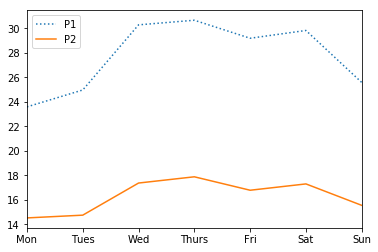

In [2]:
level_values = df_sds011.index.get_level_values
by_weekday = df_sds011.groupby(level_values(1).dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '-'])


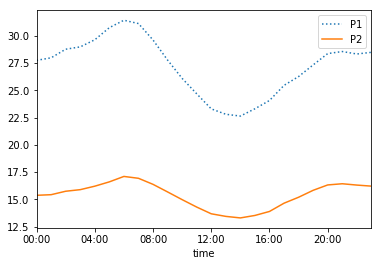

In [3]:
level_values = df_sds011.index.get_level_values
by_time = df_sds011.groupby(level_values(1)).mean()
by_time = by_time.resample('60min').mean()
by_time = by_time.groupby(by_time.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '-'])

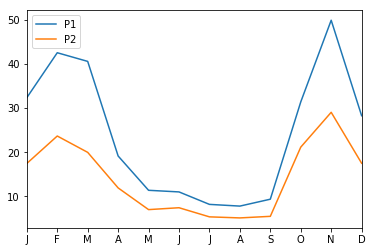

In [4]:
level_values = df_sds011.index.get_level_values
by_month = df_sds011.groupby(level_values(1).month).mean()
by_month.index = ['J', 'F','M','A', 'M','J','J', 'A','S','O', 'N','D']
monthly_ticks =  np.arange(12) 
by_month.plot(xticks=monthly_ticks)

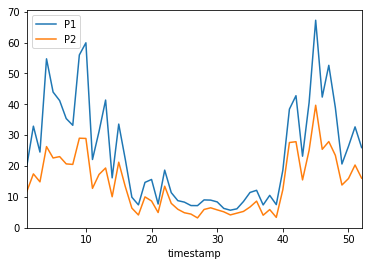

In [5]:

level_values = df_sds011.index.get_level_values
week_nr = df_sds011.groupby(level_values(1).week).mean()
week_nr.plot()